In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [3]:
tv = TfidfVectorizer()

In [4]:
transformed_output = tv.fit_transform(corpus)

In [5]:
print(tv.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [6]:
all_feature_names = tv.get_feature_names_out()

for word in all_feature_names:
  indx = tv.vocabulary_.get(word)
  print(f"{word} {tv.idf_[indx]}")

already 2.386294361119891
am 2.386294361119891
amazon 2.386294361119891
and 2.386294361119891
announcing 1.2876820724517808
apple 2.386294361119891
are 2.386294361119891
ate 2.386294361119891
biryani 2.386294361119891
dot 2.386294361119891
eating 1.9808292530117262
eco 2.386294361119891
google 2.386294361119891
grapes 2.386294361119891
iphone 2.386294361119891
ironman 2.386294361119891
is 1.1335313926245225
loki 2.386294361119891
microsoft 2.386294361119891
model 2.386294361119891
new 1.2876820724517808
pixel 2.386294361119891
pizza 2.386294361119891
surface 2.386294361119891
tesla 2.386294361119891
thor 2.386294361119891
tomorrow 1.2876820724517808
you 2.386294361119891


In [7]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [8]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Ecommerce_data.csv')

In [10]:
df.shape

(24000, 2)

In [11]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [12]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [13]:
df['label'] = df['label'].map({'Household':0, 'Electronics': 1, 'Clothing & Accessories':2, 'Books': 3})

In [14]:
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,0
1,"Contrast living Wooden Decorative Box,Painted ...",0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,2
4,Indira Designer Women's Art Mysore Silk Saree ...,2


In [15]:
from sklearn.model_selection import train_test_split

X = df['Text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38, stratify = y)

In [16]:
X_train.shape

(19200,)

In [17]:
y_train.value_counts()

label
1    4800
3    4800
0    4800
2    4800
Name: count, dtype: int64

In [18]:
y_test.value_counts()

label
0    1200
3    1200
2    1200
1    1200
Name: count, dtype: int64

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', KNeighborsClassifier())
])

In [21]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [22]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.97      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<Axes: >

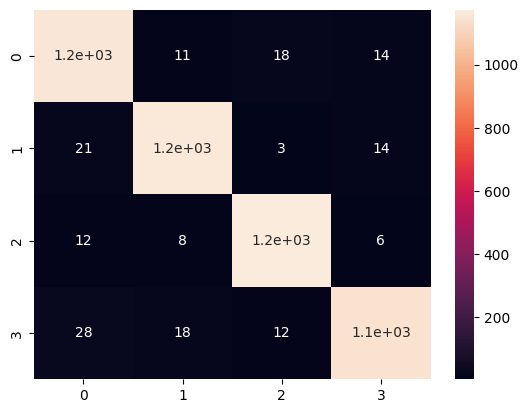

In [23]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

sns.heatmap(cm, annot=True)

In [24]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

In [25]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [26]:
print('Çlassification Report:\n', classification_report(y_test, y_pred))


Çlassification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1200
           1       0.97      0.96      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



<Axes: >

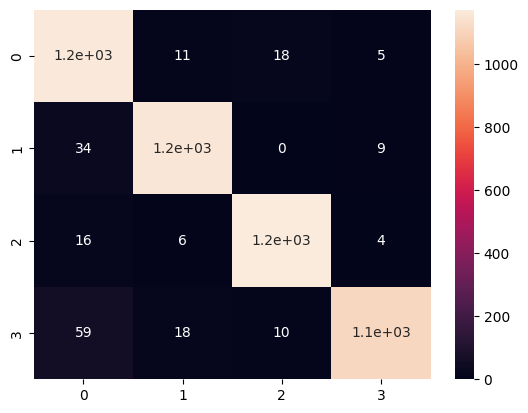

In [27]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

sns.heatmap(cm, annot=True)

In [28]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [29]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [30]:
print('Çlassification Report:\n', classification_report(y_test, y_pred))

Çlassification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.99      0.97      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



<Axes: >

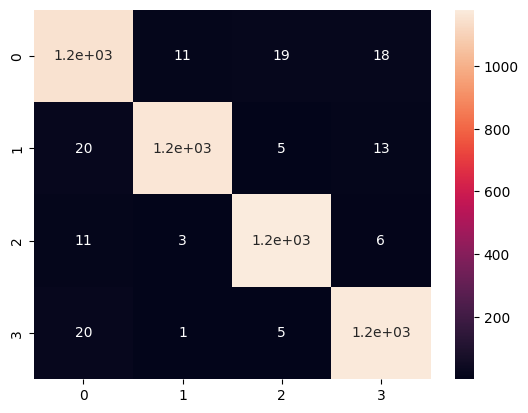

In [31]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

sns.heatmap(cm, annot=True)

In [32]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  doc = nlp(text)
  filtered_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)
  return ' '.join(filtered_tokens)

In [33]:
df['pre_processed_text'] = df['Text'].apply(preprocess)

In [34]:
X = df['pre_processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38, stratify = y)

In [35]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [36]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [37]:
print('Çlassification Report:\n', classification_report(y_test, y_pred))

Çlassification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.98      0.97      0.98      1200
           2       0.97      0.99      0.98      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



<Axes: >

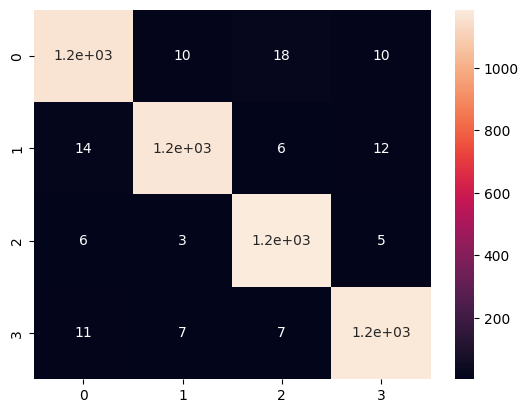

In [38]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns

sns.heatmap(cm, annot=True)